In [20]:
import pandas as pd
import numpy as np
from pybaseball import pitching_stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
SEASONS = [2024, 2025]
QUALIFIED_ONLY = False

## Fetch Data

In [3]:
data = pitching_stats(start_season=min(SEASONS), end_season=max(SEASONS), qual=50)

In [4]:
data.shape

(690, 393)

In [5]:
print(f"Column names: ({len(data.columns)}) total")
print(data.columns.tolist())

Column names: (393) total
['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls', 'Strikes', 'Pitches', 'RS', 'IFH', 'BU', 'BUH', 'K/9', 'BB/9', 'K/BB', 'H/9', 'HR/9', 'AVG', 'WHIP', 'BABIP', 'LOB%', 'FIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'IFH%', 'BUH%', 'Starting', 'Start-IP', 'Relieving', 'Relief-IP', 'RAR', 'Dollars', 'tERA', 'xFIP', 'WPA', '-WPA', '+WPA', 'RE24', 'REW', 'pLI', 'inLI', 'gmLI', 'exLI', 'Pulls', 'WPA/LI', 'Clutch', 'FB% 2', 'FBv', 'SL%', 'SLv', 'CT%', 'CTv', 'CB%', 'CBv', 'CH%', 'CHv', 'SF%', 'SFv', 'KN%', 'KNv', 'XX%', 'PO%', 'wFB', 'wSL', 'wCT', 'wCB', 'wCH', 'wSF', 'wKN', 'wFB/C', 'wSL/C', 'wCT/C', 'wCB/C', 'wCH/C', 'wSF/C', 'wKN/C', 'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%', 'HLD', 'SD', 'MD', 'ERA-', 'FIP-', 'xFIP-', 'K%', 'BB%', 'SIE

In [6]:
print(data.dtypes)

IDfg           int64
Season         int64
Name          object
Team          object
Age            int64
              ...   
Location+      int64
Pitching+      int64
Stf+ FO      float64
Loc+ FO      float64
Pit+ FO      float64
Length: 393, dtype: object


In [7]:
data.describe()

,IDfg,Season,Age,W,L,WAR,ERA,G,GS,CG,...,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,...,331.000000,133.000000,133.000000,133.000000,690.000000,690.00000,690.000000,2.00000,2.000000,2.000000
mean,20070.931884,2024.491304,29.084058,5.892754,5.657971,1.226232,3.873928,40.940580,12.563768,0.079710,...,97.359517,101.954887,99.458647,98.195489,101.273913,100.52029,101.513043,100.50000,37.000000,40.000000
std,6506.483402,0.500287,3.708368,3.645397,3.427305,1.254053,1.131892,19.694715,12.319624,0.301462,...,20.995542,15.224514,16.160891,21.420557,8.883476,6.12215,8.713334,17.67767,91.923882,96.166522
min,1247.000000,2024.000000,22.000000,0.000000,0.000000,-1.600000,0.610000,9.000000,0.000000,0.000000,...,-110.000000,61.000000,52.000000,36.000000,79.000000,79.00000,75.000000,88.00000,-28.000000,-28.000000
25%,15515.500000,2024.000000,26.000000,3.000000,3.000000,0.400000,3.100000,25.000000,0.000000,0.000000,...,90.000000,92.000000,91.000000,87.000000,95.000000,97.00000,95.000000,94.25000,4.500000,6.000000
50%,19853.000000,2024.000000,29.000000,5.000000,5.000000,1.000000,3.800000,32.000000,10.500000,0.000000,...,99.000000,101.000000,99.000000,99.000000,100.000000,101.00000,101.000000,100.50000,37.000000,40.000000
75%,24999.000000,2025.000000,32.000000,8.000000,8.000000,1.800000,4.500000,61.000000,24.750000,0.000000,...,108.000000,111.000000,109.000000,109.000000,107.000000,104.00000,107.000000,106.75000,69.500000,74.000000
max,35321.000000,2025.000000,42.000000,19.000000,17.000000,6.600000,9.360000,81.000000,34.000000,2.000000,...,174.000000,144.000000,196.000000,201.000000,129.000000,125.00000,130.000000,113.00000,102.000000,108.000000


In [8]:
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({'missing_count': missing_values, 'missing_percent': missing_percent}).sort_values('missing_percent', ascending=False)

print(missing_df[missing_df['missing_count'] > 0])

            missing_count  missing_percent
wFT (sc)              690       100.000000
SB-X (pi)             690       100.000000
FT-Z (sc)             690       100.000000
FT-X (sc)             690       100.000000
wFT/C (sc)            690       100.000000
...                   ...              ...
SL% (pi)               35         5.072464
wFB                     1         0.144928
FBv                     1         0.144928
FB% 2                   1         0.144928
wFB/C                   1         0.144928

[230 rows x 2 columns]


In [9]:
threshold = 50
cols_to_drop = missing_df[missing_df['missing_percent'] > threshold].index
data_cleaned = data.drop(columns=cols_to_drop)
data_cleaned.shape

(690, 280)

In [10]:
if 'GS' in data_cleaned.columns and 'G' in data_cleaned.columns:
    data_cleaned['GS_rate'] = data_cleaned['GS'] / data_cleaned['G']
    data_cleaned['Role'] = data_cleaned['GS_rate'].apply(
        lambda x: 'Starter' if x > 0.5 else 'Reliever'
    )
    
    print(f"Total pitchers: {len(data_cleaned)}")
    print(f"Starters: {(data_cleaned['Role'] == 'Starter').sum()}")
    print(f"Relievers: {(data_cleaned['Role'] == 'Reliever').sum()}")
    
    # Filter by minimum innings pitched
    MIN_IP_STARTER = 50
    MIN_IP_RELIEVER = 30
    
    starters = data_cleaned[
        (data_cleaned['Role'] == 'Starter') & 
        (data_cleaned['IP'] >= MIN_IP_STARTER)
    ].copy()
    
    relievers = data_cleaned[
        (data_cleaned['Role'] == 'Reliever') & 
        (data_cleaned['IP'] >= MIN_IP_RELIEVER)
    ].copy()
    
    print(f"\nAfter IP filtering:")
    print(f"Starters (>={MIN_IP_STARTER} IP): {len(starters)}")
    print(f"Relievers (>={MIN_IP_RELIEVER} IP): {len(relievers)}")
    
    # Focus on starters for clustering (you can change this)
    data_filtered = starters
    print(f"\nUsing STARTERS for clustering: {len(data_filtered)} pitchers")
else:
    # Fallback if GS/G columns don't exist
    MIN_IP = 50
    data_filtered = data_cleaned[data_cleaned['IP'] >= MIN_IP].copy()
    print(f"Filtered to pitchers with >={MIN_IP} IP: {len(data_filtered)}")

Total pitchers: 690
Starters: 346
Relievers: 344

After IP filtering:
Starters (>=50 IP): 346
Relievers (>=30 IP): 344

Using STARTERS for clustering: 346 pitchers


In [ ]:
potential_features = ['K%', 'BB%', 'HR/9', 'BABIP', 'LOB%', 'LD%', 'GB%', 'FB%', 'Zone%', 'F-Strike%', 'SwStr%', 'Stuff+', 'Location+', 'Pitching+', 'vFA (sc)']

In [24]:
clustering_features = [f for f in potential_features if f in data_filtered.columns]
print(f"Using features for clustering: {clustering_features}")

Using features for clustering: ['K%', 'BB%', 'HR/9', 'BABIP', 'LOB%', 'LD%', 'GB%', 'FB%', 'Zone%', 'F-Strike%', 'SwStr%', 'Stuff+', 'Location+', 'Pitching+', 'vFA (sc)']


In [25]:
df_cluster = data_filtered.dropna(subset=clustering_features).copy()

In [26]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(df_cluster[clustering_features])

X_scaled_df = pd.DataFrame(X_scaled, columns=clustering_features, index=df_cluster.index)  
print(f"Data ready for clustering. Shape: {X_scaled_df.shape}")

Data ready for clustering. Shape: (334, 15)


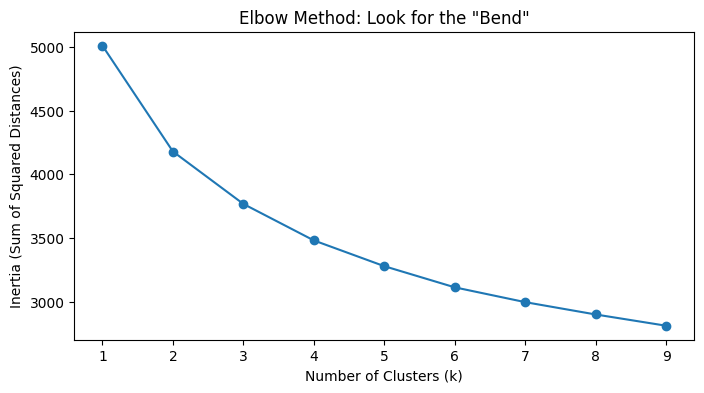

In [27]:
# 4. Find optimal K (The Elbow Method)
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method: Look for the "Bend"')
plt.show()

Cluster Summary (The 4 Types of Pitchers):
               K%       BB%   vFA (sc)      Stuff+  Name       WAR
Cluster                                                           
2        0.271354  0.065772  95.267089  104.873418    79  3.055696
0        0.223524  0.082119  94.423810   99.071429    84  1.967857
1        0.185630  0.064228  92.538043   92.456522    92  1.116304
3        0.209873  0.095608  93.164557   95.088608    79  0.974684


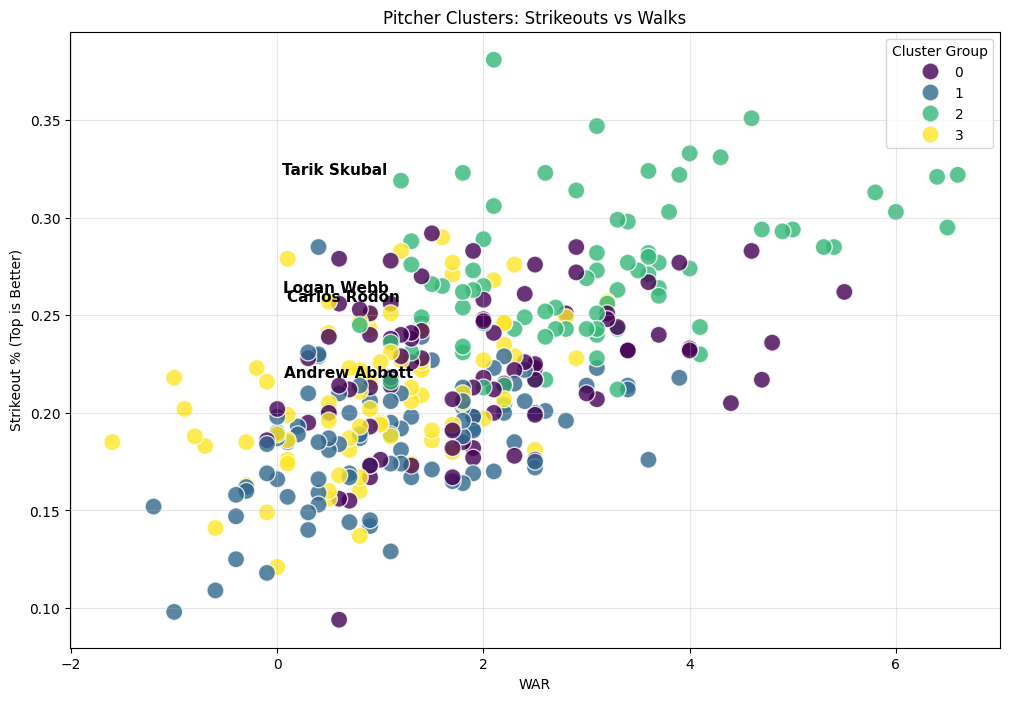

In [37]:
# 1. Set the chosen K (based on your chart)
optimal_k = 4

# 2. Run the Model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# 3. Analyze the Groups (The "Scouting Report")
# We group by Cluster to see the average stats for each tier
# This tells us WHICH cluster is the "Aces" (High K%, Low SIERA)
stat_summary = df_cluster.groupby('Cluster')[clustering_features + ['Name', 'WAR']].agg({
    'K%': 'mean',
    'BB%': 'mean',
    'vFA (sc)': 'mean', # Velocity
    'Stuff+': 'mean',   # If you have it
    'Name': 'count',    # How many pitchers in this group?
    'WAR': 'mean'       # Average WAR (to help identify the "Best" group)
}).sort_values(by='WAR', ascending=False) # Sort so "Aces" are likely at the top

print("Cluster Summary (The 4 Types of Pitchers):")
print(stat_summary)

# 4. Visualize the Clusters (K% vs BB%)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_cluster, 
    x='WAR', 
    y='K%', 
    hue='Cluster', 
    palette='viridis', 
    s=150, 
    alpha=0.8
)

# Label the "Best" pitcher in each cluster to help identify them
for cluster_id in range(optimal_k):
    # Find the pitcher with the highest WAR in this cluster
    best_in_cluster = df_cluster[df_cluster['Cluster'] == cluster_id].sort_values('WAR', ascending=False).iloc[0]
    plt.text(
        best_in_cluster['BB%']+0.002, 
        best_in_cluster['K%'], 
        best_in_cluster['Name'], 
        fontsize=11, 
        weight='bold',
        color='black'
    )

plt.title('Pitcher Clusters: Strikeouts vs Walks')
plt.xlabel('WAR')
plt.ylabel('Strikeout % (Top is Better)')
plt.legend(title='Cluster Group')
plt.grid(True, alpha=0.3)
plt.show()

In [48]:
# 1. Define your Logic (Adjust these IDs based on your previous printout!)
# Example assumption:
# Cluster 0: High K%, High WAR -> "Elite Power Pitcher"
# Cluster 1: Low BB%, Med K% -> "Control Specialist"
# Cluster 2: High BB%, Low K% -> "Developing/Struggling"
# Cluster 3: Avg everything -> "Inning Eater / Mid-Rotation"

# FUNCTION to name clusters automatically
def name_cluster(row):
    # We use the cluster centers (averages) to decide names
    # You can also hard-code this map if you know Cluster 2 is definitely the Aces
    c_id = row['Cluster']
    
    # REPLACE these numbers with the actual Cluster IDs from your specific run
    if c_id == 2:  # The one with highest K%
        return "Elite Power Arm"
    elif c_id == 0: # The one with lowest BB%
        return "Control Artist"
    elif c_id == 3: # The one with high GB% or avg stats
        return "Workhorse Starter"
    else:
        return "Fringe/Depth"

# Apply the names
df_cluster['Archetype'] = df_cluster.apply(name_cluster, axis=1)

print(df_cluster[['Name', 'Cluster', 'Archetype', 'K%', 'WAR', 'vFA (sc)']])

                 Name  Cluster          Archetype     K%  WAR  vFA (sc)
42       Tarik Skubal        2    Elite Power Arm  0.322  6.6      97.6
22        Paul Skenes        2    Elite Power Arm  0.295  6.5      98.2
53         Chris Sale        2    Elite Power Arm  0.321  6.4      94.8
54       Tarik Skubal        2    Elite Power Arm  0.303  6.0      96.8
73    Garrett Crochet        2    Elite Power Arm  0.313  5.8      96.4
..                ...      ...                ...    ...  ...       ...
688      Bobby Miller        3  Workhorse Starter  0.202 -0.9      97.6
602  Triston McKenzie        3  Workhorse Starter  0.218 -1.0      91.1
689   Bradley Blalock        1       Fringe/Depth  0.098 -1.0      94.6
685    Taijuan Walker        1       Fringe/Depth  0.152 -1.2      91.5
675     Roddery Munoz        3  Workhorse Starter  0.185 -1.6      95.4

[334 rows x 6 columns]


In [43]:
def find_similar_pitchers(pitcher_name, df, top_n=5):
    # 1. Find the target pitcher
    try:
        target = df[df['Name'] == pitcher_name].iloc[0]
    except IndexError:
        return f"Pitcher '{pitcher_name}' not found."

    # 2. Filter to only pitchers in the same Cluster
    cluster_mates = df[df['Cluster'] == target['Cluster']].copy()
    
    # 3. Calculate Distance (Euclidean Distance based on key stats)
    # We simply measure how 'far' other pitchers are in terms of K%, BB%, and Velocity
    from sklearn.metrics.pairwise import euclidean_distances
    
    features = ['K%', 'BB%', 'SIERA'] # Use the same features you clustered with
    
    # Get the target's stats
    target_stats = target[features].values.reshape(1, -1)
    
    # Get everyone else's stats
    others_stats = cluster_mates[features].values
    
    # Calculate distances
    cluster_mates['Distance'] = euclidean_distances(target_stats, others_stats)[0]
    
    # 4. Sort by smallest distance (closest match)
    # Exclude the player themselves (distance 0)
    recommendations = cluster_mates[cluster_mates['Name'] != pitcher_name].sort_values('Distance').head(top_n)
    
    print(f"Pitchers similar to {pitcher_name} ({target['Archetype']}):")
    return recommendations[['Name', 'Archetype', 'K%', 'BB%', 'SIERA']]

# Test it out!
find_similar_pitchers('Nick Pivetta', df_cluster)
# find_similar_pitchers('Kyle Hendricks', df_cluster)

Pitchers similar to Nick Pivetta (Elite Power Arm):


,Name,Archetype,K%,BB%,SIERA
427,Taj Bradley,Elite Power Arm,0.266,0.081,3.69
285,Aaron Nola,Elite Power Arm,0.240,0.061,3.68
88,Freddy Peralta,Elite Power Arm,0.282,0.091,3.68
432,Jared Jones,Elite Power Arm,0.262,0.077,3.72
546,Brandon Pfaadt,Elite Power Arm,0.243,0.055,3.65


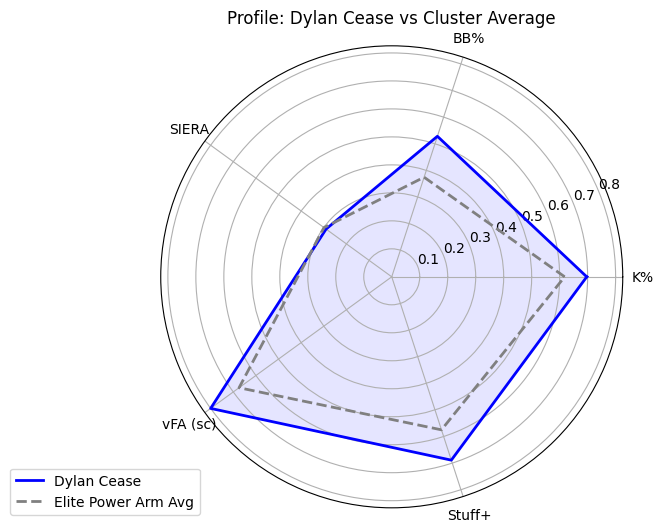

In [45]:
import numpy as np

def plot_radar_profile(player_name, df):
    # 1. Get Data
    try:
        player = df[df['Name'] == player_name].iloc[0]
    except IndexError:
        print(f"Player {player_name} not found.")
        return

    # Features to display on the radar
    categories = ['K%', 'BB%', 'SIERA', 'vFA (sc)', 'Stuff+']
    # Ensure these cols exist, otherwise pick others
    categories = [c for c in categories if c in df.columns]
    
    # 2. Get the Cluster Average for comparison
    cluster_avg = df[df['Cluster'] == player['Cluster']][categories].mean()
    
    # 3. Scale Data to 0-1 range for the chart (Percentiles are best, but MinMax works for simple viz)
    # A simple normalize function for this chart
    def normalize(val, col_name):
        min_v = df[col_name].min()
        max_v = df[col_name].max()
        return (val - min_v) / (max_v - min_v)

    player_vals = [normalize(player[c], c) for c in categories]
    avg_vals = [normalize(cluster_avg[c], c) for c in categories]
    
    # Close the loop for radar chart
    player_vals += [player_vals[0]]
    avg_vals += [avg_vals[0]]
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += [angles[0]]
    
    # 4. Plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Draw one axe per variable + labels
    plt.xticks(angles[:-1], categories)
    
    # Plot Player
    ax.plot(angles, player_vals, linewidth=2, linestyle='solid', label=player_name, color='blue')
    ax.fill(angles, player_vals, 'blue', alpha=0.1)
    
    # Plot Cluster Avg
    ax.plot(angles, avg_vals, linewidth=2, linestyle='dashed', label=f"{player['Archetype']} Avg", color='gray')
    
    plt.title(f"Profile: {player_name} vs Cluster Average")
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

# Run it
plot_radar_profile('Dylan Cease', df_cluster)

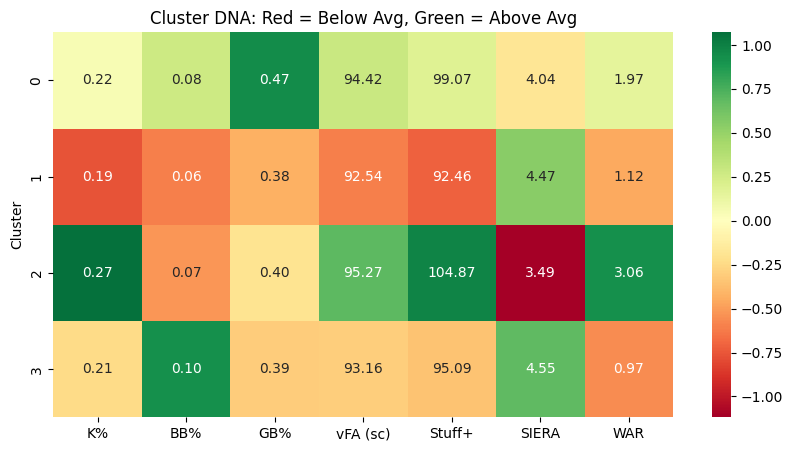

In [46]:
# 1. Calculate the average stats for each cluster
# Ensure we include specific "identity" stats like GB% (Groundball) and vFA (Velocity)
identity_stats = ['K%', 'BB%', 'GB%', 'vFA (sc)', 'Stuff+', 'SIERA', 'WAR']
# Filter for ones that actually exist in your data
available_identity = [c for c in identity_stats if c in df_cluster.columns]

cluster_summary = df_cluster.groupby('Cluster')[available_identity].mean()

# 2. Plot a Heatmap
# We normalize the data (Z-score) just for the plot so colors are comparable
# (e.g. 50% GB rate is "High" but 30% K rate is also "High")
normalized_summary = (cluster_summary - df_cluster[available_identity].mean()) / df_cluster[available_identity].std()

plt.figure(figsize=(10, 5))
sns.heatmap(normalized_summary, annot=cluster_summary, fmt=".2f", cmap='RdYlGn', center=0)
plt.title('Cluster DNA: Red = Below Avg, Green = Above Avg')
plt.show()

In [49]:
def assign_archetype(row):
    c_id = row['Cluster']
    
    # Mapped directly from your Heatmap analysis
    if c_id == 2:
        return "Power Ace"
    elif c_id == 0:
        return "Groundball Specialist"
    elif c_id == 1:
        return "Finesse / Control Pitcher"
    elif c_id == 3:
        return "High-Walk / Struggling"
    else:
        return "Unknown"

# 1. Apply the labels
df_cluster['Archetype'] = df_cluster.apply(assign_archetype, axis=1)

# 2. Verify it worked
print("Archetype Assignment Check:")
print(df_cluster['Archetype'].value_counts())

# 3. Preview the "Aces" to make sure the names match reality
print("\nTop 5 Power Aces by WAR:")
print(df_cluster[df_cluster['Archetype'] == "Power Ace"][['Name', 'WAR', 'Stuff+', 'K%']].sort_values('WAR', ascending=False).head(5))

Archetype Assignment Check:
Archetype
Finesse / Control Pitcher    92
Groundball Specialist        84
Power Ace                    79
High-Walk / Struggling       79
Name: count, dtype: int64

Top 5 Power Aces by WAR:
               Name  WAR  Stuff+     K%
42     Tarik Skubal  6.6     116  0.322
22      Paul Skenes  6.5     107  0.295
53       Chris Sale  6.4     104  0.321
54     Tarik Skubal  6.0     112  0.303
73  Garrett Crochet  5.8     116  0.313


In [55]:
df_cluster.to_csv('pitcher_clusters_2024.csv', index=False)

In [56]:
# 1. Re-Filter for Relievers (Just in case)
# Ensure we are using the original cleaned data
if 'Role' not in data_cleaned.columns:
    # Quick reconstruction if needed
    data_cleaned['GS_rate'] = data_cleaned['GS'] / data_cleaned['G']
    data_cleaned['Role'] = data_cleaned['GS_rate'].apply(lambda x: 'Starter' if x > 0.5 else 'Reliever')

# Filter: Relievers with at least 30 Innings (Standard sample size stability)
relievers = data_cleaned[
    (data_cleaned['Role'] == 'Reliever') & 
    (data_cleaned['IP'] >= 30)
].copy()

print(f"Relievers ready for clustering: {len(relievers)}")

# 2. Select Features (Same features work, but the scale is different)
reliever_features = ['K%', 'BB%', 'GB%', 'vFA (sc)', 'Stuff+', 'SIERA']

# Drop missing values
df_relievers = relievers.dropna(subset=reliever_features).copy()

# 3. Scale the Data
from sklearn.preprocessing import StandardScaler
scaler_reliever = StandardScaler()
X_reliever_scaled = scaler_reliever.fit_transform(df_relievers[reliever_features])

print(f"Data scaled. Shape: {X_reliever_scaled.shape}")

Relievers ready for clustering: 344
Data scaled. Shape: (319, 6)


In [68]:
# Check for duplicates based on Name and Season
duplicates = df_relievers[df_relievers.duplicated(subset=['Name', 'Season'], keep=False)]

print(f"Found {len(duplicates)} duplicate rows.")
print("Sample of duplicates (notice the 'Team' and 'IP' columns):")
print(duplicates[['Name', 'Season', 'Team', 'IP', 'WAR']].sort_values(by='Name').head(10))

Found 0 duplicate rows.
Sample of duplicates (notice the 'Team' and 'IP' columns):
Empty DataFrame
Columns: [Name, Season, Team, IP, WAR]
Index: []


In [69]:
# 1. Sort by Name, Season, and IP (highest IP first)
# This puts the "Total" season row at the top for every player
df_relievers_clean = df_relievers.sort_values(by=['Name', 'Season', 'IP'], ascending=[True, True, False])

# 2. Drop duplicates, keeping the first one (which is now the highest IP row)
df_relievers_clean = df_relievers_clean.drop_duplicates(subset=['Name', 'Season'], keep='first')

print(f"Original Count: {len(df_relievers)}")
print(f"Clean Count:    {len(df_relievers_clean)}")
print(f"Removed {len(df_relievers) - len(df_relievers_clean)} duplicate rows.")

# 3. Overwrite your variable so you don't use the bad one by accident
df_relievers = df_relievers_clean.copy()

Original Count: 319
Clean Count:    319
Removed 0 duplicate rows.


In [70]:
df_relievers

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Stf+ SL,Loc+ SL,Pit+ SL,Stuff+,Location+,Pitching+,GS_rate,Role,Cluster,Archetype
187,19343,2024,A.J. Puk,- - -,29,4,9,1.7,3.15,62,...,111.0,123.0,130.0,109,111,118,0.064516,Reliever,0,High Leverage / Closer
36,23550,2025,Aaron Ashby,MIL,27,5,2,1.2,2.16,43,...,157.0,67.0,99.0,123,103,121,0.023256,Reliever,0,High Leverage / Closer
290,16258,2024,Aaron Bummer,ATL,30,4,3,1.1,3.58,56,...,123.0,96.0,108.0,114,98,106,0.000000,Reliever,0,High Leverage / Closer
351,16258,2025,Aaron Bummer,ATL,31,3,2,0.4,3.81,42,...,118.0,76.0,85.0,111,92,98,0.047619,Reliever,1,Middle Relief / Control
5,25327,2025,Abner Uribe,MIL,25,3,2,1.7,1.67,75,...,129.0,105.0,127.0,117,99,114,0.000000,Reliever,0,High Leverage / Closer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,25911,2025,Yennier Cano,BAL,31,3,7,0.1,5.12,65,...,113.0,101.0,108.0,103,96,98,0.000000,Reliever,1,Middle Relief / Control
606,22872,2025,Yoendrys Gomez,- - -,25,3,3,0.1,5.17,21,...,115.0,88.0,97.0,99,89,88,0.428571,Reliever,2,Wild / Replacement Level
331,33826,2024,Yuki Matsui,SDP,28,4,2,0.3,3.73,64,...,106.0,86.0,96.0,102,94,98,0.000000,Reliever,2,Wild / Replacement Level
398,33826,2025,Yuki Matsui,SDP,29,3,1,-0.3,3.98,61,...,102.0,96.0,103.0,103,96,100,0.000000,Reliever,2,Wild / Replacement Level


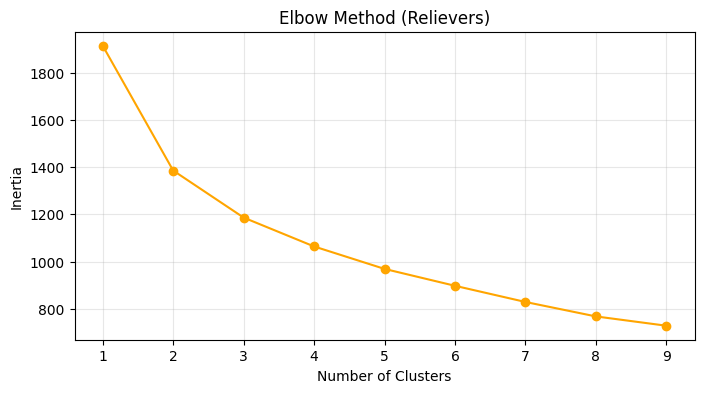

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_reliever_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o', color='orange') # Orange for Relievers
plt.title('Elbow Method (Relievers)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True, alpha=0.3)
plt.show()

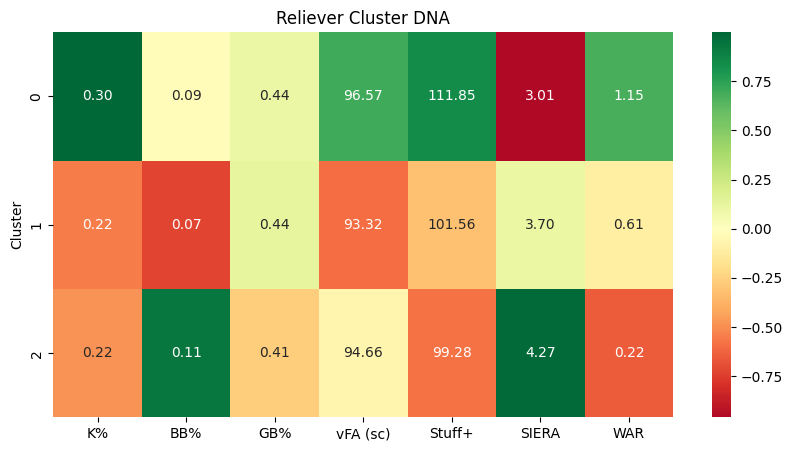

Cluster
1    116
0    109
2     94
Name: count, dtype: int64


In [60]:
import seaborn as sns

# 1. Run K-Means (Let's assume K=4 for High Lev, Mid Lev, Groundball, Low Lev)
k_relievers = 3
kmeans_rel = KMeans(n_clusters=k_relievers, random_state=42, n_init=10)
df_relievers['Cluster'] = kmeans_rel.fit_predict(X_reliever_scaled)

# 2. Create the Heatmap (The "Fingerprint")
# We group by Cluster to see the average stats
summary_rel = df_relievers.groupby('Cluster')[reliever_features + ['WAR']].mean()

# Normalize for the plot (Green = Above Avg, Red = Below Avg)
normalized_rel = (summary_rel - df_relievers[reliever_features + ['WAR']].mean()) / df_relievers[reliever_features + ['WAR']].std()

plt.figure(figsize=(10, 5))
sns.heatmap(normalized_rel, annot=summary_rel, fmt=".2f", cmap='RdYlGn', center=0)
plt.title('Reliever Cluster DNA')
plt.show()

# 3. Print the Counts
print(df_relievers['Cluster'].value_counts())

In [66]:
def name_reliever_archetype(row):
    c_id = row['Cluster']
    
    # Logic derived from your Heatmap (0=Elite, 1=Control, 2=Wild)
    if c_id == 0:
        return "High Leverage / Closer"
    elif c_id == 1:
        return "Middle Relief / Control"
    elif c_id == 2:
        return "Wild / Replacement Level"
    else:
        return "Unknown"

# 1. Apply the names
df_relievers['Archetype'] = df_relievers.apply(name_reliever_archetype, axis=1)

# 2. Verify
print("Reliever Archetypes:")
print(df_relievers['Archetype'].value_counts())

# 3. Check the "Closers" to make sure the names make sense
print("\nTop 5 High Leverage Arms:")
print(df_relievers[df_relievers['Archetype'] == "High Leverage / Closer"][['Name', 'K%', 'vFA (sc)', 'Stuff+']].head(5))
print("\nTop 5 Middle Relief / Control Arms:")
print(df_relievers[df_relievers['Archetype'] == "Middle Relief / Control"][['Name', 'K%', 'vFA (sc)', 'Stuff+']].head(5))
print("\nTop 5 Wild / Replacement Level Arms:")
print(df_relievers[df_relievers['Archetype'] == "Wild / Replacement Level"][['Name', 'K%', 'vFA (sc)', 'Stuff+']].head(5))

Reliever Archetypes:
Archetype
Middle Relief / Control     116
High Leverage / Closer      109
Wild / Replacement Level     94
Name: count, dtype: int64

Top 5 High Leverage Arms:
                Name     K%  vFA (sc)  Stuff+
130       Cade Smith  0.347      96.4     108
14        Cade Smith  0.356      96.0     104
2    Aroldis Chapman  0.373      98.4     108
26       Griffin Jax  0.344      97.1     110
27      Ryan Helsley  0.297      99.6     129

Top 5 Middle Relief / Control Arms:
                  Name     K%  vFA (sc)  Stuff+
172      Nick Martinez  0.204      92.6      95
133        Jack Dreyer  0.241      92.7      99
92        Sean Newcomb  0.233      93.3     101
3        Hunter Gaddis  0.237      95.4      99
282  Carmen Mlodzinski  0.212      96.1     104

Top 5 Wild / Replacement Level Arms:
               Name     K%  vFA (sc)  Stuff+
204   Joey Cantillo  0.269      91.7      89
110      Jacob Latz  0.218      94.2     103
636      Joey Wentz  0.208      93.4      88
6

In [75]:
df_cluster.to_csv('starting_pitcher_clusters.csv', index=False)

df_relievers.to_csv('reliever_clusters.csv', index=False)

df_starters = pd.read_csv('starting_pitcher_clusters.csv')
df_starters['Position'] = 'SP'

df_relievers['Position'] = 'RP'

common_columns = list(set(df_starters.columns) & set(df_relievers.columns))
final_master = pd.concat([df_starters[common_columns], df_relievers[common_columns]], ignore_index=True)

final_master.to_csv('master_pitcher_clusters_2024.csv', index=False)